# Website Performance Analysis – Full Project

### As of 2025, the total number of websites on the internet is estimated to be around 110 to 120 crore.  Over 60% of web traffic now comes from mobile devices. 



### Key Questions for Website Traffic and Engagement Analysis

1. What patterns or trends can you observe in website sessions and users over time?

2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

4. How does engagement rate vary across different traffic channels?

5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

6. At what hours of the day does each channel drive the most traffic?

7. Is there any correlation between high traffic (sessions) and high engagement rate over time?


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
df = pd.read_csv('data-export (1).csv')

In [13]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel Group", "DateHour", "User", "Sessions", "Engaged sessions", 
              "Average engagement time per session",	"Engaged sessions per user", 
              "Events per session",	"Engagement rate",	"Event count"]
df.head()

,Channel Group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   User                                 3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [16]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')
df.head()

,Channel Group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [17]:
numeric_cols = df.columns.drop(['Channel Group', 'DateHour'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [18]:
df.head()

,Channel Group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [19]:
df.describe()

,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


### 1. What patterns or trends can you observe in website sessions and users over time?

In [20]:
sns.set(style="whitegrid")

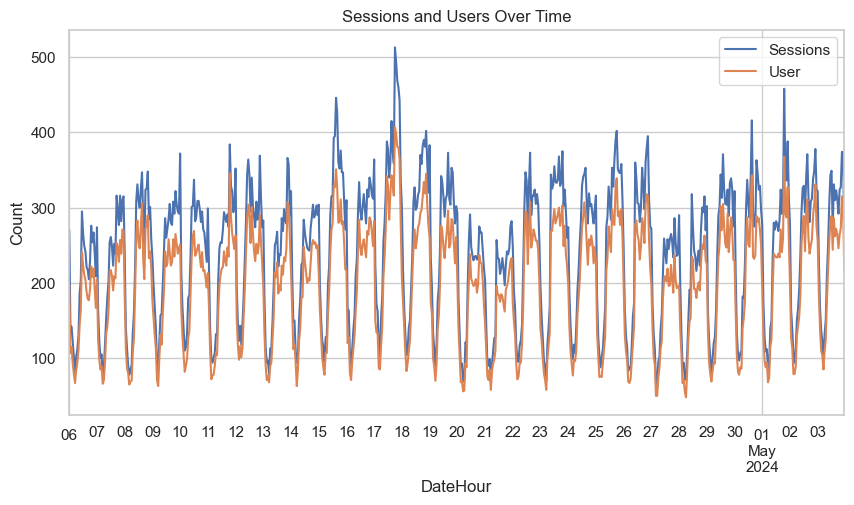

In [21]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions", "User"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

### 2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

C:\Users\Shubham Chaurasiya\AppData\Local\Temp\ipykernel_30684\1525880387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="User", estimator=np.sum,


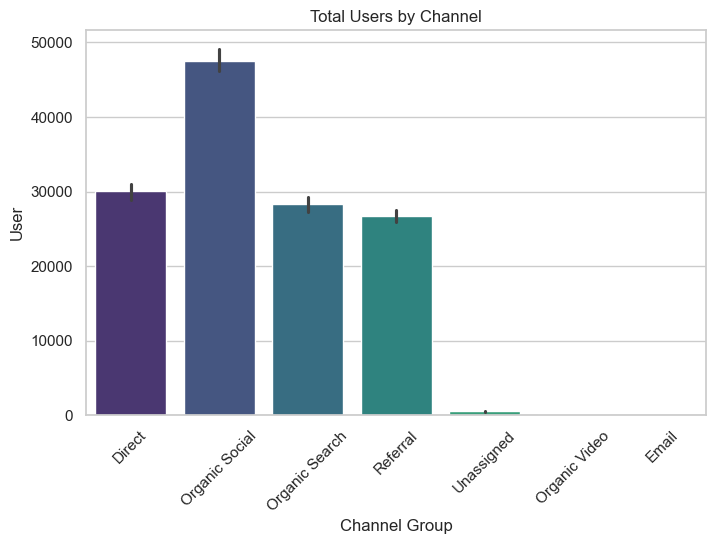

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Channel Group", y="User", estimator=np.sum, 
            palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

### 3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

C:\Users\Shubham Chaurasiya\AppData\Local\Temp\ipykernel_30684\3544933120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group",


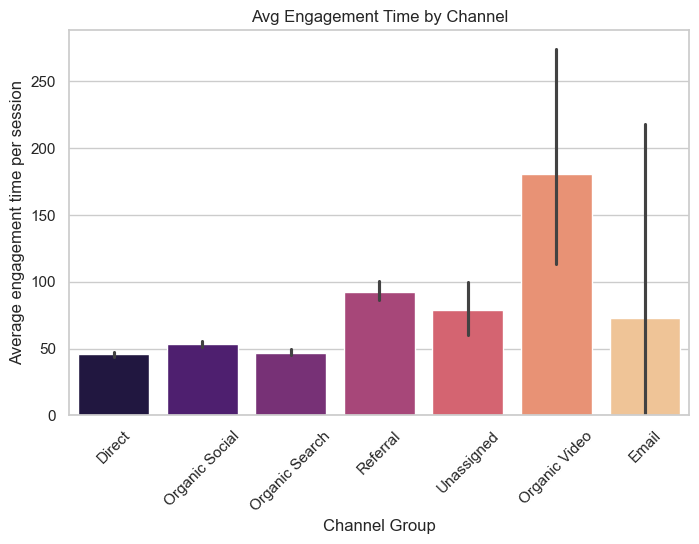

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Channel Group", 
            y="Average engagement time per session", 
            estimator=np.mean, palette="magma",  legend=False)
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

### 4. How does engagement rate vary across different traffic channels?

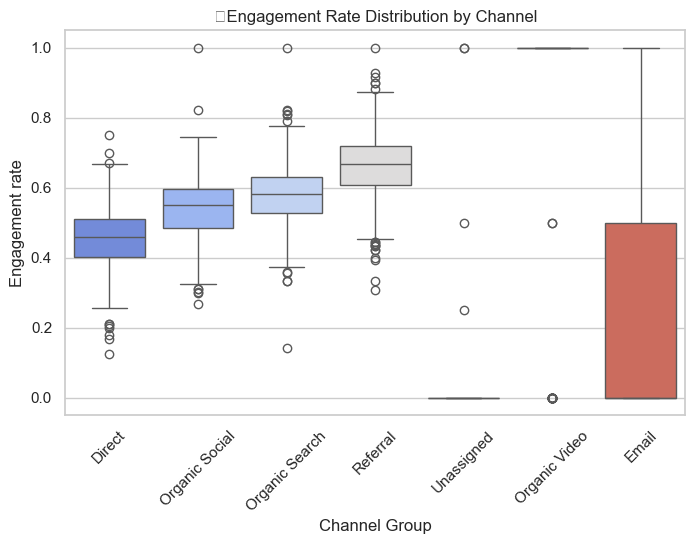

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", hue="Channel Group", palette="coolwarm", legend=False)
plt.title("📦Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

### 5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?


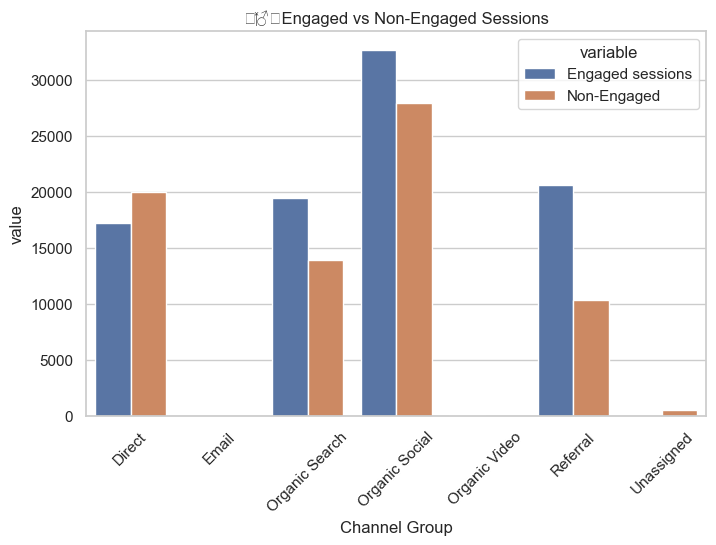

In [25]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.title("🧍‍♂️Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

### 6. At what hours of the day does each channel drive the most traffic?

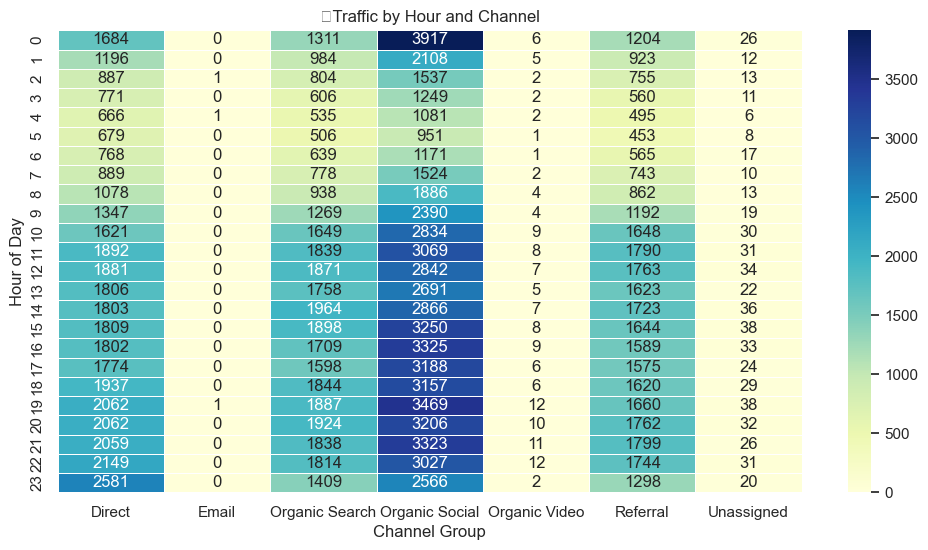

In [26]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("⏰Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

### 7. Is there any correlation between high traffic (sessions) and high engagement rate over time?

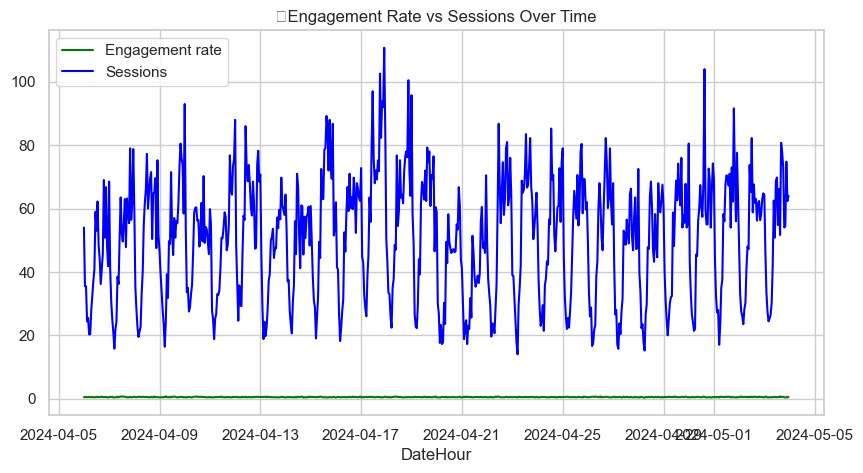

In [27]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("📊Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()